# Analysis of Top Investment Banks

## Research Questions to Answer:

* What is the market share of each of the top investment banks in terms of revenue and assets? (pie charts?)
* How has the revenue and profitability of the top investment banks evolved over the past five years? (line charts?)
* What are the key drivers of revenue and profitability for investment banks? 
* What is the geographic distribution of revenue and assets for the top investment banks? (world map?)
* How do the top investment banks compare in terms of risk management and governance?

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import json
import requests
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gdp
import fiona

In [ ]:
#1##################################################################################################

In [ ]:
url = 'https://data.sec.gov/submissions/CIK'

In [ ]:
banks_dictionary = { 'Goldman Sachs': '0000886982','JPMorgan': '0000019617',
                    'Morgan Stanley': '0000895421','BofA Securities': '0000070858','Jeffries':'0000096223',
                    'Citi': '0000831001','Barclays': '0000312070','Credit Suisse': '0001321482',
                    'RBC': '0000050916','Deutsche Bank': '0001159508'}
print(banks_dictionary)

In [ ]:
 # Set the API base URL
url = 'https://data.sec.gov/submissions/CIK'

print("Beginning Data Retrieval     ")
print("-----------------------------")

bank_data = []

for bank in banks_dictionary:
    CIK = banks_dictionary[bank]
    query = url + CIK
    query_json = query + '.json'

    response = requests.get(query_json, headers={'user-agent':'Mozilla/5.0'})
    
    
    bank = response.json()['name']
    fiscal_year = response.json()['fiscalYearEnd']
    filings = response.json()['filings']
    
    bank_data.append({"Bank": bank, "Fiscal Year": fiscal_year})

print(bank_data)



In [ ]:

bank_df = pd.DataFrame(bank_data)
bank_df

In [ ]:
bank_df.to_csv("DATA/banks.csv", index_label="ID")

In [ ]:
bank_df = pd.read_csv("DATA/banks.csv", index_col="ID")

In [ ]:
bank_df

In [ ]:
#2##################################################################################################

In [ ]:
url = 'https://data.sec.gov/submissions/CIK'

In [ ]:
CIK = '0000886982'

In [ ]:
query = url + CIK
query_json = query + '.json'
print(query_json)

In [ ]:
response = requests.get(query_json, headers={'user-agent':'Mozilla/5.0'})
json_response = response.json()

In [ ]:
print(json_response)

In [ ]:
with open('./test_json.json', 'w') as test_file:
    json.dump(json_response, test_file, indent=4, sort_keys=True)
 

In [ ]:
print(json_response.keys())

In [ ]:
#some of Adam's notes:

#pd.DataFrame([{'name':'doc1','a':'1'},{'name':'doc2','b':'2'},{'name':'doc3','a':'3'},])

# Script1: Loop through list of companies, call API, save data
#### OPTIONAL get other data with other scripts
# Script 2: Load data into data frame and clean
# Script3: Perform data  analysis

In [ ]:
#3###############################################################################################
# run top cells then start from here 

In [9]:
bank_data_to_load = "DATA/tester_file.csv"
#WARNING: tester_file.csv contains placeholder values, replace with actual data
bank_data_df = pd.read_csv(bank_data_to_load)
bank_data_df.head(2)


,Bank,Fiscal Year,Total IB Fees,Market Share %,Net Interest Income,Non Interest Income,Total Revenue,Total Non-Interest Expense,Net Income,Total Assets,Total Liabilities,IB Fees as a % of Net Revenue,IB Fees as a % of Non-Interest Income
0,Jefferies,2021,4366,$0.13,89,8096,8185,5760,1677,60404,49674,0.53,0.54
1,Jefferies,2020,2501,$0.12,88,5923,6011,4784,768,53118,43530,0.42,0.42


In [10]:
#To Do: Excel file numbers all measured in millions
# $ taken out in Excel  
# IB %s formatted to % ? in Excel

# bank_data_df["Total IB fees"] = bank_data_df["Total IB fees"].astype(str).str.replace("\D+","",regex=True)
# bank_data_df["Total IB fees"] = bank_data_df["Total IB fees"].map(lambda x: x.lstrip("$"))
# bank_data_df["Total IB fees"] = pd.to_numeric(bank_data_df["Total IB fees"])
# bank_data_df["Net Interest Income"] = bank_data_df["Net Interest Income"].astype(str).str.replace("\D+","",regex=True)
# bank_data_df["Net Interest Income"] = bank_data_df["Net Interest Income"].map(lambda x: x.lstrip("$"))
# bank_data_df["Net Interest Income"] = pd.to_numeric(bank_data_df["Net Interest Income"])
# bank_data_df["Non interest income"] = bank_data_df["Non interest income"].astype(str).str.replace("\D+","",regex=True)
# bank_data_df["Non interest income"] = bank_data_df["Non interest income"].map(lambda x: x.lstrip("$"))
# bank_data_df["Non interest income"] = pd.to_numeric(bank_data_df["Non interest income"])
# bank_data_df["Total Revenue"] = bank_data_df["Total Revenue"].astype(str).str.replace("\D+","",regex=True)
# bank_data_df["Total Revenue"] = bank_data_df["Total Revenue"].map(lambda x: x.lstrip("$"))
# bank_data_df["Total Revenue"] = pd.to_numeric(bank_data_df["Total Revenue"])
# bank_data_df["Total non-interest expense"] = bank_data_df["Total non-interest expense"].astype(str).str.replace("\D+","",regex=True)
# bank_data_df["Total non-interest expense"] = bank_data_df["Total non-interest expense"].map(lambda x: x.lstrip("$"))
# bank_data_df["Total non-interest expense"] = pd.to_numeric(bank_data_df["Total non-interest expense"])
# bank_data_df["Net Income"] = bank_data_df["Net Income"].astype(str).str.replace("\D+","",regex=True)
# bank_data_df["Net Income"] = bank_data_df["Net Income"].map(lambda x: x.lstrip("$"))
# bank_data_df["Net Income"] = pd.to_numeric(bank_data_df["Net Income"])
# bank_data_df["Total Assets"] = bank_data_df["Total Assets"].astype(str).str.replace("\D+","",regex=True)
# bank_data_df["Total Assets"] = bank_data_df["Total Assets"].map(lambda x: x.lstrip("$"))
# bank_data_df["Total Assets"] = pd.to_numeric(bank_data_df["Total Assets"])
# bank_data_df["Total Liabilities"] = bank_data_df["Total Liabilities"].astype(str).str.replace("\D+","",regex=True)
# bank_data_df["Total Liabilities"] = bank_data_df["Total Liabilities"].map(lambda x: x.lstrip("$"))
# bank_data_df["Total Liabilities"] = pd.to_numeric(bank_data_df["Total Liabilities"])
# bank_data_df["IB fees as a % of net revenue"] = bank_data_df["IB fees as a % of net revenue"].astype(str).str.replace("\D+","",regex=True)
# bank_data_df["IB fees as a % of net revenue"] = bank_data_df["IB fees as a % of net revenue"].map(lambda x: x.lstrip("$"))
# bank_data_df["IB fees as a % of net revenue"] = pd.to_numeric(bank_data_df["IB fees as a % of net revenue"])

#seems to work now but keep this for a while
#bank_data_df['Fiscal Year'] = bank_data_df['Fiscal Year'].astype('int64')

In [11]:
bank_data_df['Bank'].unique()

array(['Jefferies', 'Credit Suisse', 'Citi Bank', 'Barclays',
       'Goldman Sachs', 'JP Morgan', 'RBC Bank', 'Deutsche Bank',
       'Bank of America', 'Morgan Stanley'], dtype=object)

In [12]:
jeff_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Jefferies',['Total IB Fees']]
jeff_plot_df = jeff_plot_df.iloc[::-1]

suisse_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Credit Suisse',['Total IB Fees']]
suisse_plot_df = suisse_plot_df.iloc[::-1]

citi_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Citi Bank',['Total IB Fees']]
citi_plot_df = citi_plot_df.iloc[::-1]

bar_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Barclays',['Total IB Fees']]
bar_plot_df = bar_plot_df.iloc[::-1]

gs_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Goldman Sachs',['Total IB Fees']]
gs_plot_df = gs_plot_df.iloc[::-1]

jp_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'JP Morgan',['Total IB Fees']]
jp_plot_df = jp_plot_df.iloc[::-1]

rbc_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'RBC Bank',['Total IB Fees']]
rbc_plot_df = rbc_plot_df.iloc[::-1]

deutsche_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Deutsche Bank',['Total IB Fees']]
deutsche_plot_df = deutsche_plot_df.iloc[::-1]

bac_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Bank of America',['Total IB Fees']]
bac_plot_df = bac_plot_df.iloc[::-1]

ms_plot_df = bank_data_df.loc[bank_data_df['Bank'] == 'Morgan Stanley',['Total IB Fees']]
ms_plot_df = ms_plot_df.iloc[::-1]


suisse_plot_df

,Total IB Fees
9,12129
8,12053
7,11476
6,13316
5,14440


<IPython.core.display.Javascript object>


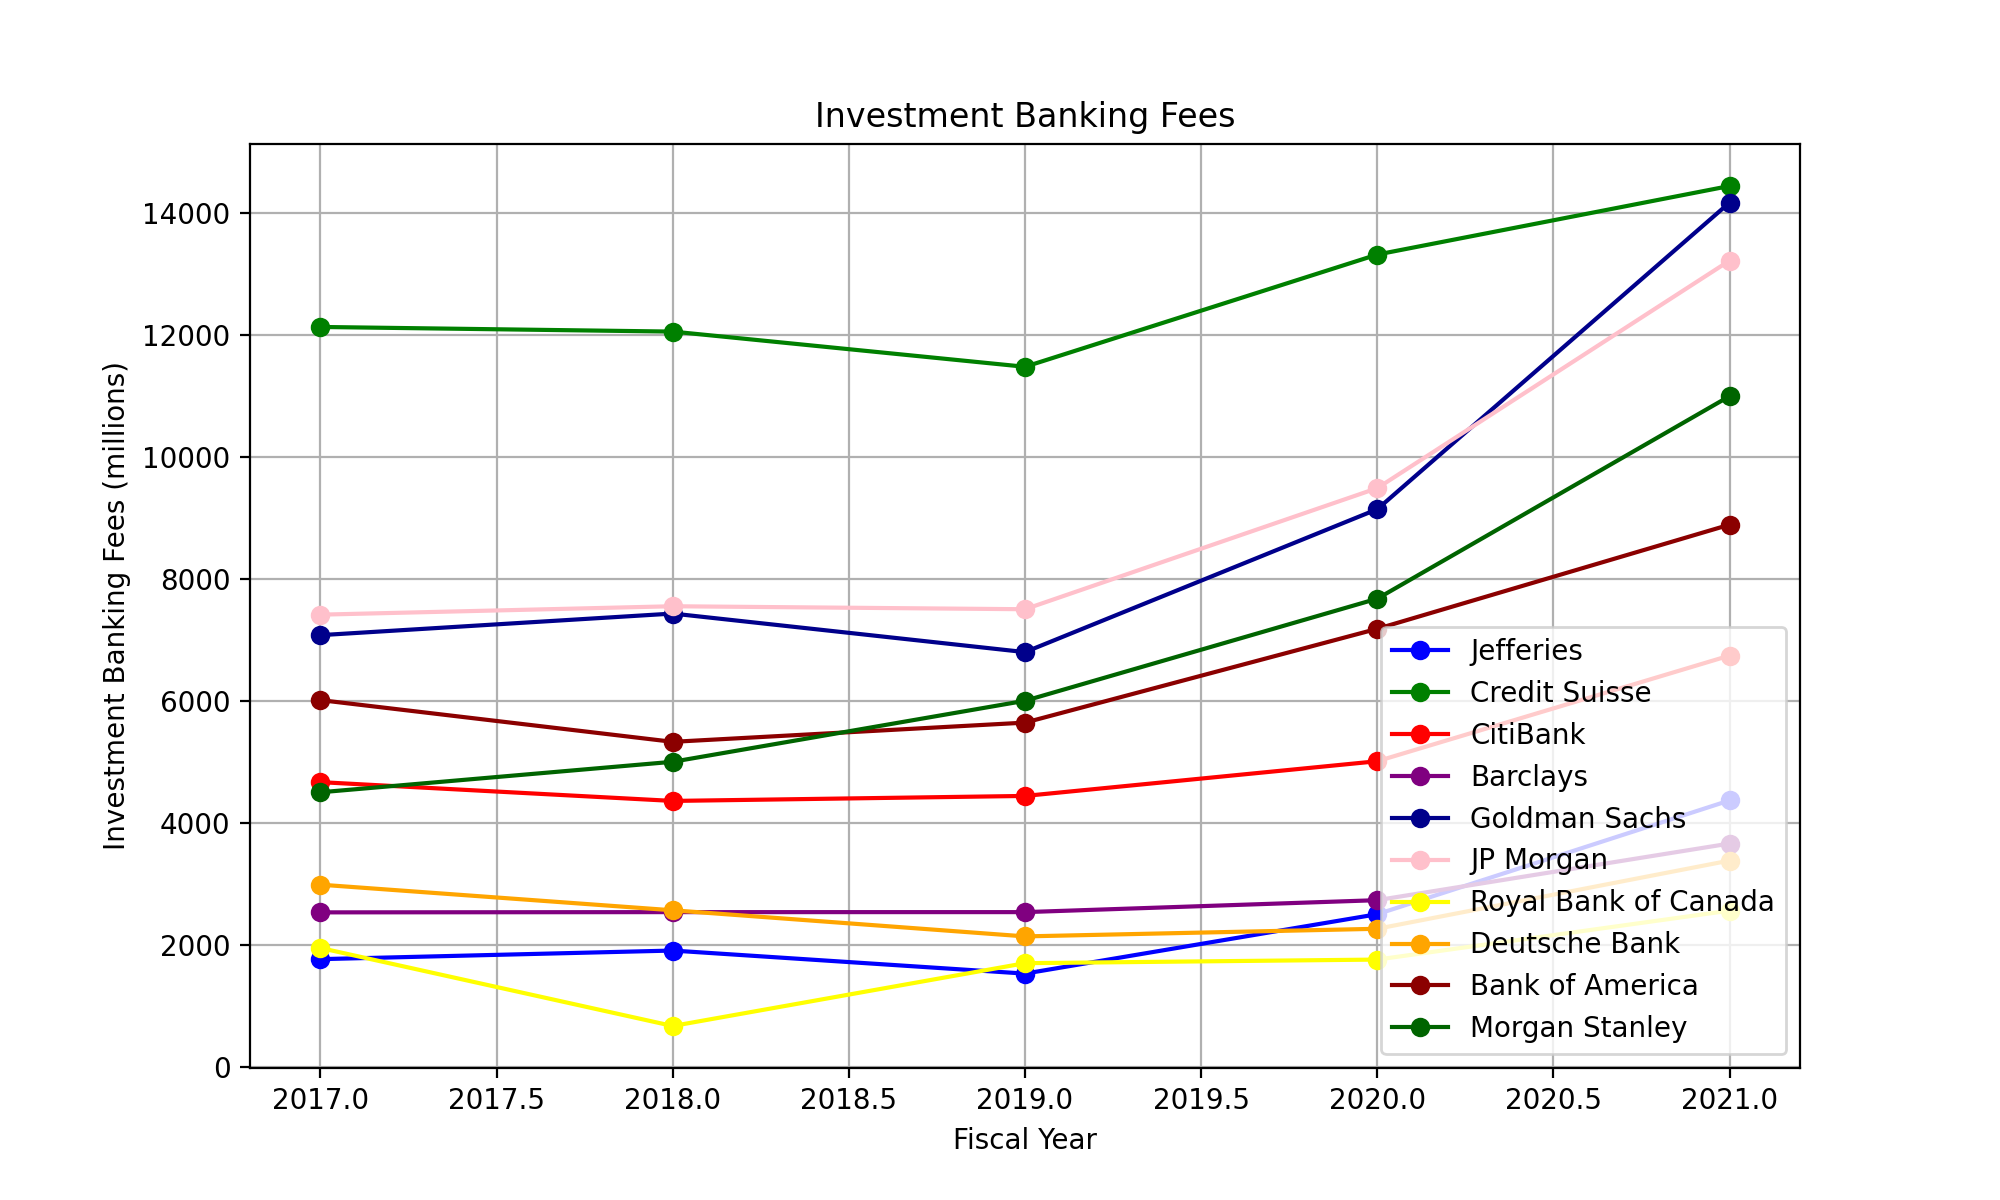

In [13]:
x_axis = np.sort(bank_data_df['Fiscal Year'].unique(), axis=-1)

x_tick_locations = [value for value in x_axis]
plt.figure(0,figsize=(10,6))

jeff = plt.plot(x_axis, jeff_plot_df['Total IB Fees'], marker ='o', color='blue', label="Jefferies")
suisse = plt.plot(x_axis, suisse_plot_df['Total IB Fees'], marker ='o', color='green', label="Credit Suisse")
citi = plt.plot(x_axis, citi_plot_df['Total IB Fees'], marker ='o', color='red', label="CitiBank")
bar = plt.plot(x_axis, bar_plot_df['Total IB Fees'], marker ='o', color='purple', label="Barclays")
gs = plt.plot(x_axis, gs_plot_df['Total IB Fees'], marker ='o', color='darkblue', label="Goldman Sachs")
jp = plt.plot(x_axis, jp_plot_df['Total IB Fees'], marker ='o', color='pink', label="JP Morgan")
rbc = plt.plot(x_axis, rbc_plot_df['Total IB Fees'], marker ='o', color='yellow', label="Royal Bank of Canada")
d = plt.plot(x_axis, deutsche_plot_df['Total IB Fees'], marker='o', color='orange', label="Deutsche Bank")
bac = plt.plot(x_axis, bac_plot_df['Total IB Fees'], marker='o', color='darkred', label="Bank of America")
ms = plt.plot(x_axis, ms_plot_df['Total IB Fees'], marker='o', color='darkgreen', label="Morgan Stanley")
#plt.xticks(x_tick_locations,1)
legend = plt.legend(loc='lower right')
plt.title("Investment Banking Fees")
plt.xlabel("Fiscal Year")
plt.ylabel("Investment Banking Fees (millions)")
plt.grid()
plt.show()

In [15]:
bank_data_df['Bank'].unique()

array(['Jefferies', 'Credit Suisse', 'Citi Bank', 'Barclays',
       'Goldman Sachs', 'JP Morgan', 'RBC Bank', 'Deutsche Bank',
       'Bank of America', 'Morgan Stanley'], dtype=object)

In [16]:
jeff_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Jefferies',['IB Fees as a % of Net Revenue']]
jeff_percent_df = jeff_percent_df.iloc[::-1]

suisse_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Credit Suisse',['IB Fees as a % of Net Revenue']]
suisse_percent_df = suisse_percent_df.iloc[::-1]

citi_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Citi Bank',['IB Fees as a % of Net Revenue']]
citi_percent_df = citi_percent_df.iloc[::-1]
                                                                        
bar_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Barclays',['IB Fees as a % of Net Revenue']]
bar_percent_df = bar_percent_df.iloc[::-1]

gs_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Goldman Sachs',['IB Fees as a % of Net Revenue']]
gs_percent_df = gs_percent_df.iloc[::-1]

jp_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'JP Morgan',['IB Fees as a % of Net Revenue']]
jp_percent_df = jp_percent_df.iloc[::-1]
                                                                
rbc_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'RBC Bank',['IB Fees as a % of Net Revenue']]
rbc_percent_df = rbc_percent_df.iloc[::-1]

deutsche_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Deutsche Bank',['IB Fees as a % of Net Revenue']]
deutsche_percent_df = deutsche_percent_df.iloc[::-1]

bac_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Bank of America',['IB Fees as a % of Net Revenue']]
bac_percent_df = bac_percent_df.iloc[::-1]

ms_percent_df = bank_data_df.loc[bank_data_df['Bank'] == 'Morgan Stanley',['IB Fees as a % of Net Revenue']]
ms_percent_df = ms_percent_df.iloc[::-1]

<IPython.core.display.Javascript object>


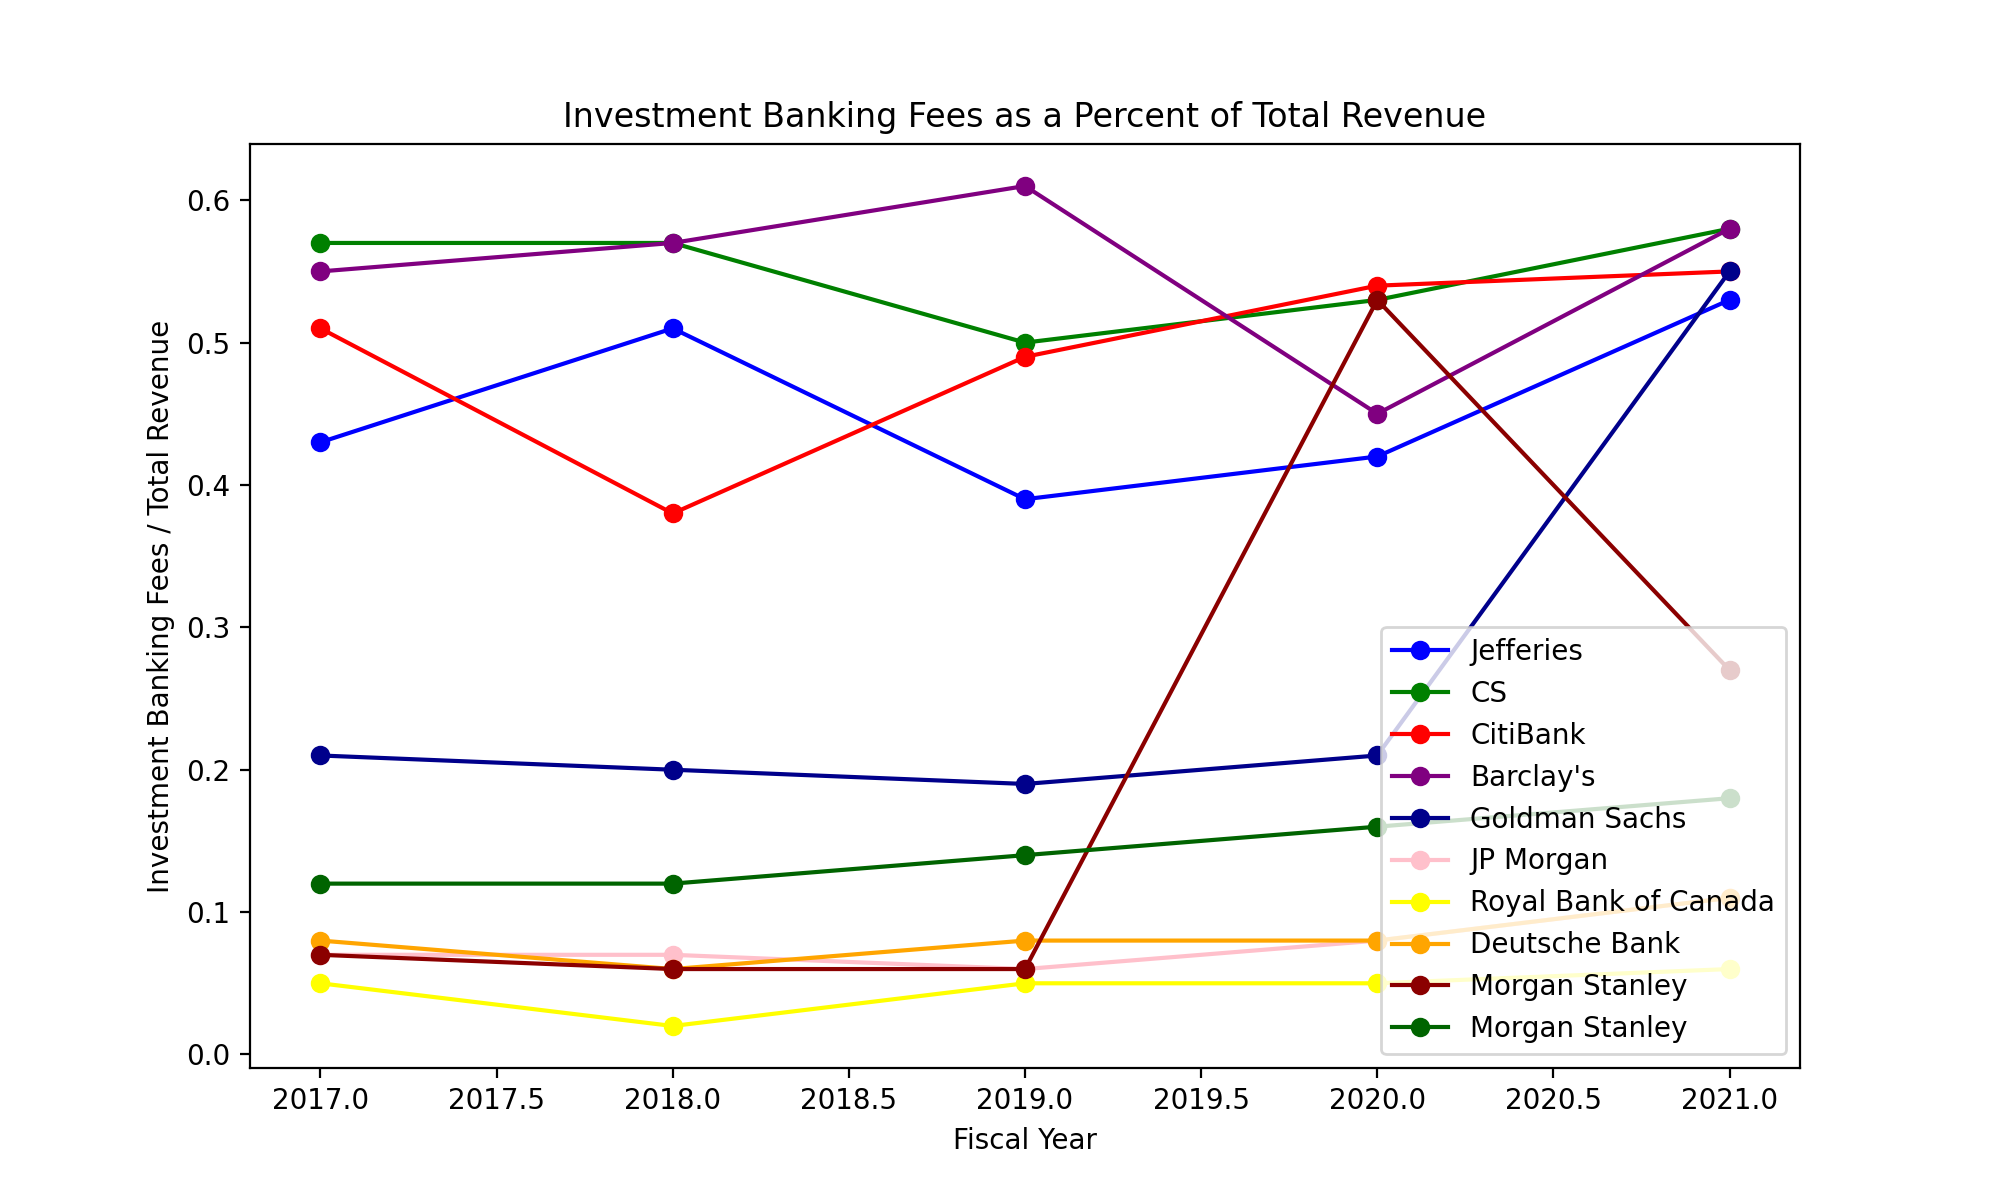

In [17]:
x_axis = np.sort(bank_data_df['Fiscal Year'].unique(), axis=-1)
y_axis = np.arange(0,105, 5)
plt.figure(1,figsize=(10,6))
jeff_percent = plt.plot(x_axis, jeff_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color='blue', label="Jefferies")
suisse_percent = plt.plot(x_axis, suisse_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color='green', label="CS")
citi = plt.plot(x_axis, citi_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color='red', label="CitiBank")
bar = plt.plot(x_axis, bar_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color='purple', label="Barclay's")
gs = plt.plot(x_axis, gs_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color='darkblue', label="Goldman Sachs")
jp = plt.plot(x_axis, jp_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color='pink', label="JP Morgan")
rbc = plt.plot(x_axis, rbc_percent_df['IB Fees as a % of Net Revenue'], marker ='o', color='yellow', label="Royal Bank of Canada")
d = plt.plot(x_axis, deutsche_percent_df['IB Fees as a % of Net Revenue'], marker='o', color='orange', label="Deutsche Bank")
bac = plt.plot(x_axis, bac_percent_df['IB Fees as a % of Net Revenue'], marker='o', color='darkred', label="Morgan Stanley")
ms = plt.plot(x_axis, ms_percent_df['IB Fees as a % of Net Revenue'], marker='o', color='darkgreen', label="Morgan Stanley")
plt.title("Investment Banking Fees as a Percent of Total Revenue")
plt.xlabel("Fiscal Year")
plt.ylabel("Investment Banking Fees / Total Revenue")
legend = plt.legend(loc='lower right')
plt.show()



In [ ]:
## pie charts

<IPython.core.display.Javascript object>


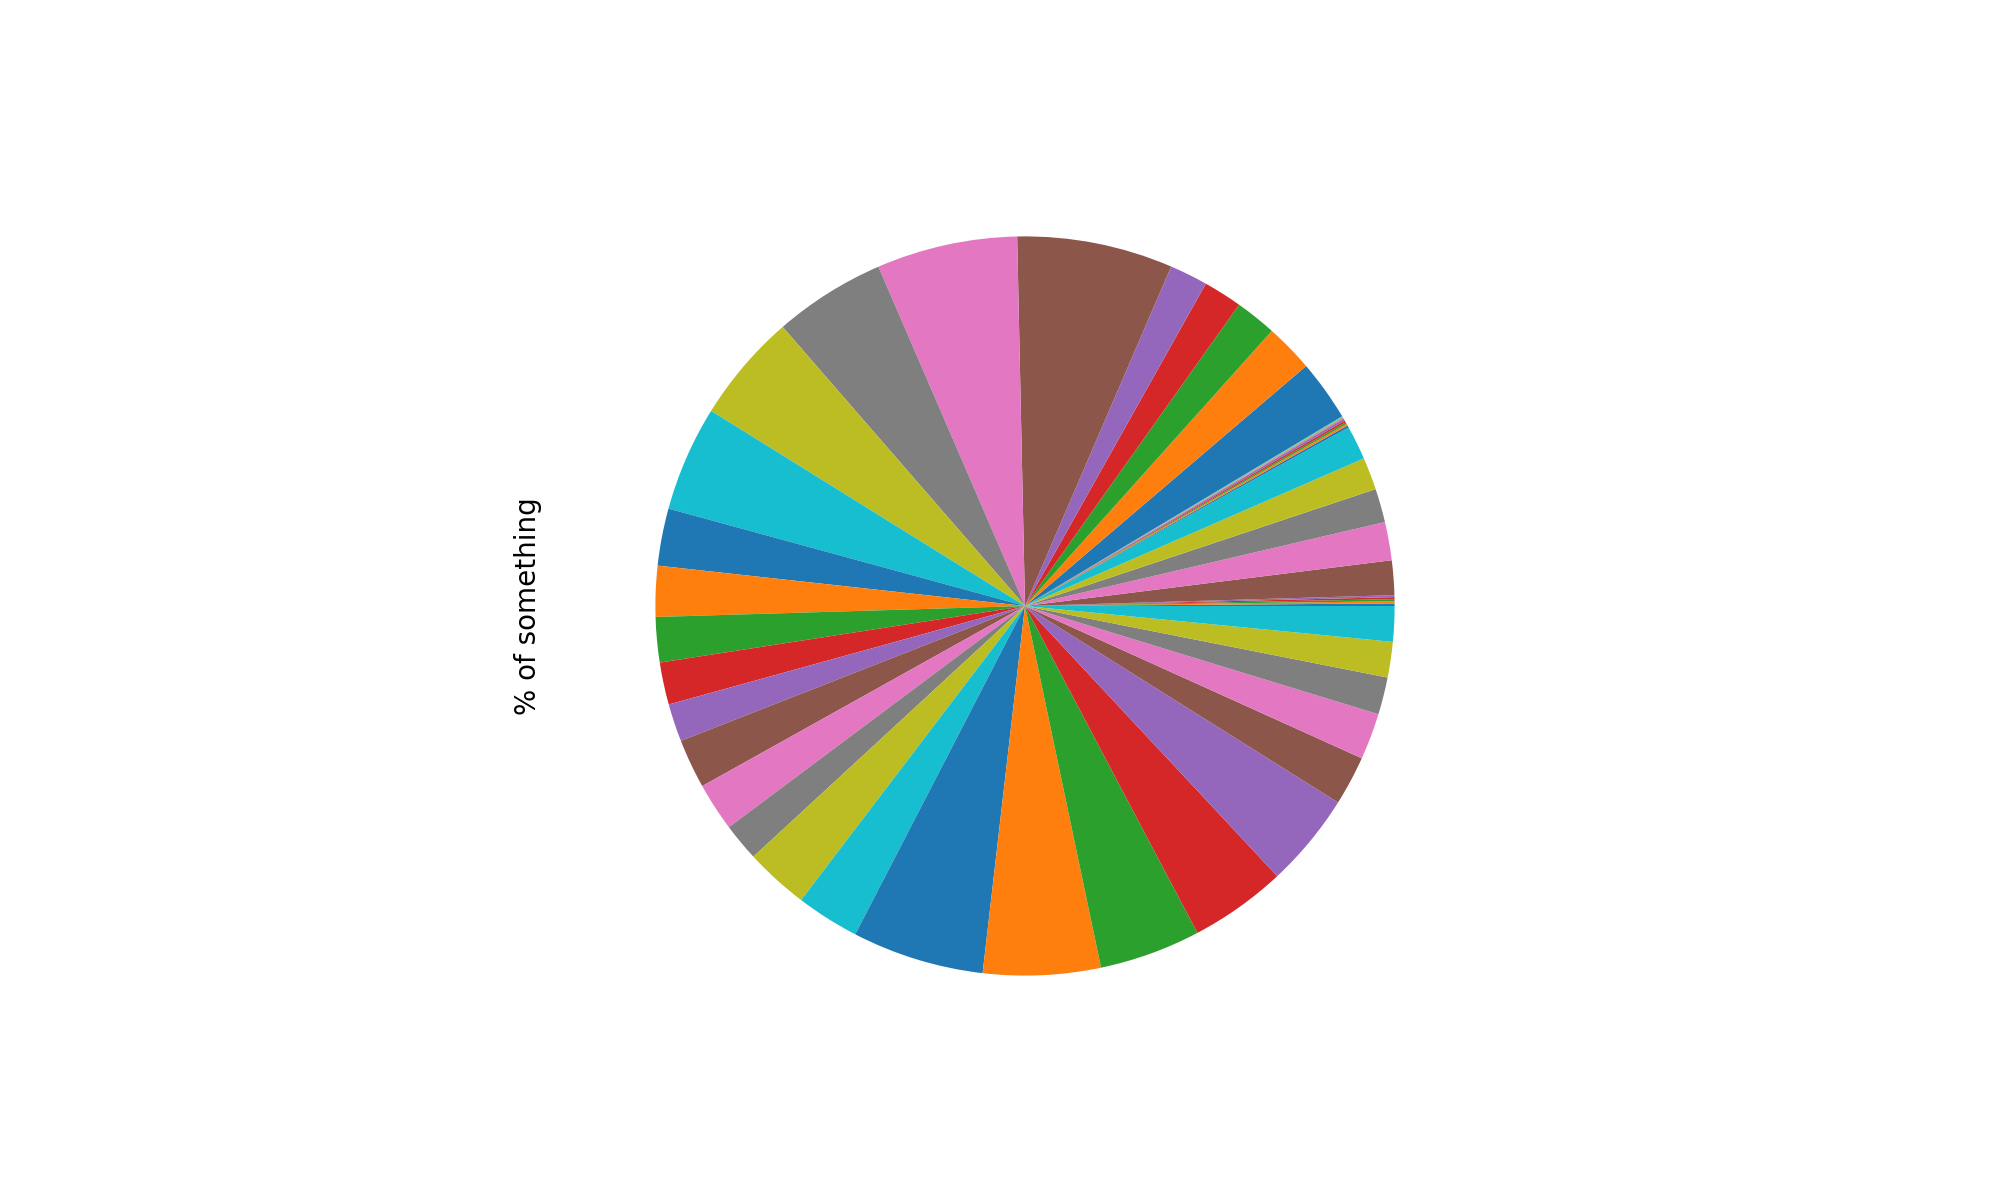

In [18]:
labels = bank_data_df["Bank"].unique()

colors = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Purple', 'DarkBlue', 'Pink', 'DarkOrange', 'SkyBlue']
plt.figure(2,figsize=(10,6))
plt.pie(bank_data_df['Total Assets']) #, labels=labels, colors=colors, autopct="%1.1f%%", startangle=90)

plt.ylabel("% of something")
plt.show()

[towardsdatascience.com/the-easiest-way-to-plot-data-from-pandas-on-a-world-map](https://towardsdatascience.com/the-easiest-way-to-plot-data-from-pandas-on-a-world-map-1a62962a27f3)

<IPython.core.display.Javascript object>


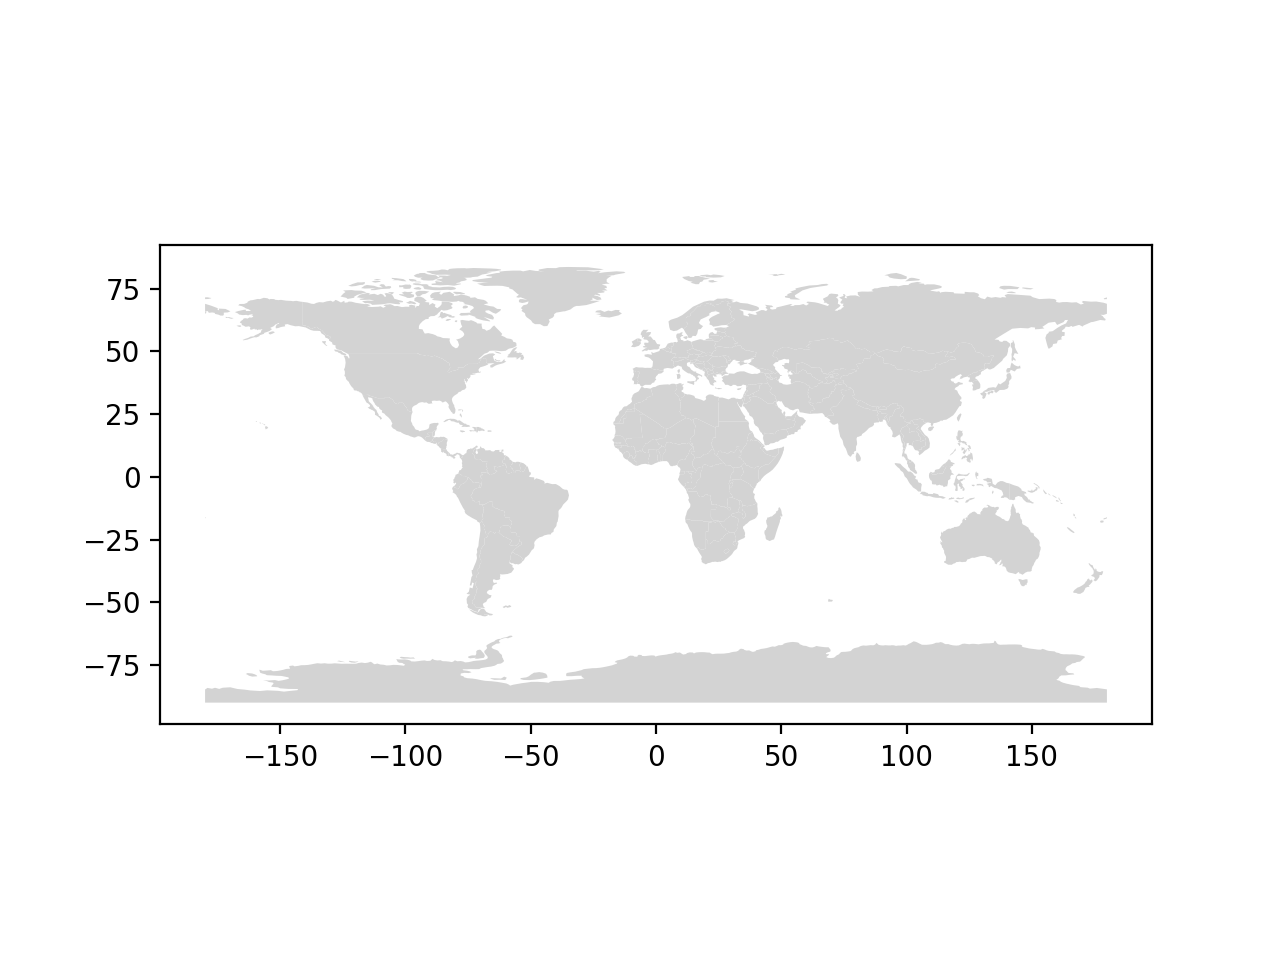

In [19]:

world_map = gdp.read_file(gdp.datasets.get_path("naturalearth_lowres"))
world_map.plot(color="lightgrey")
plt.figure(3)
plt.show()